In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [ ]:
test_data = pd.read_csv("/content/test.csv")
train_data = pd.read_csv("/content/train.csv")

In [ ]:
df = pd.merge(test_data, train_data)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [ ]:
df["job"] = df["job"].astype("category")
df["marital"] = df["marital"].astype("category")
df["education"] = df["education"].astype("category")
df["default"] = df["default"].astype("category")
df["housing"] = df["housing"].astype("category")
df["loan"] = df["loan"].astype("category")
df["contact"] = df["contact"].astype("category")
df["poutcome"] = df["poutcome"].astype("category")
df["y"] = df["y"].astype("category")

In [ ]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

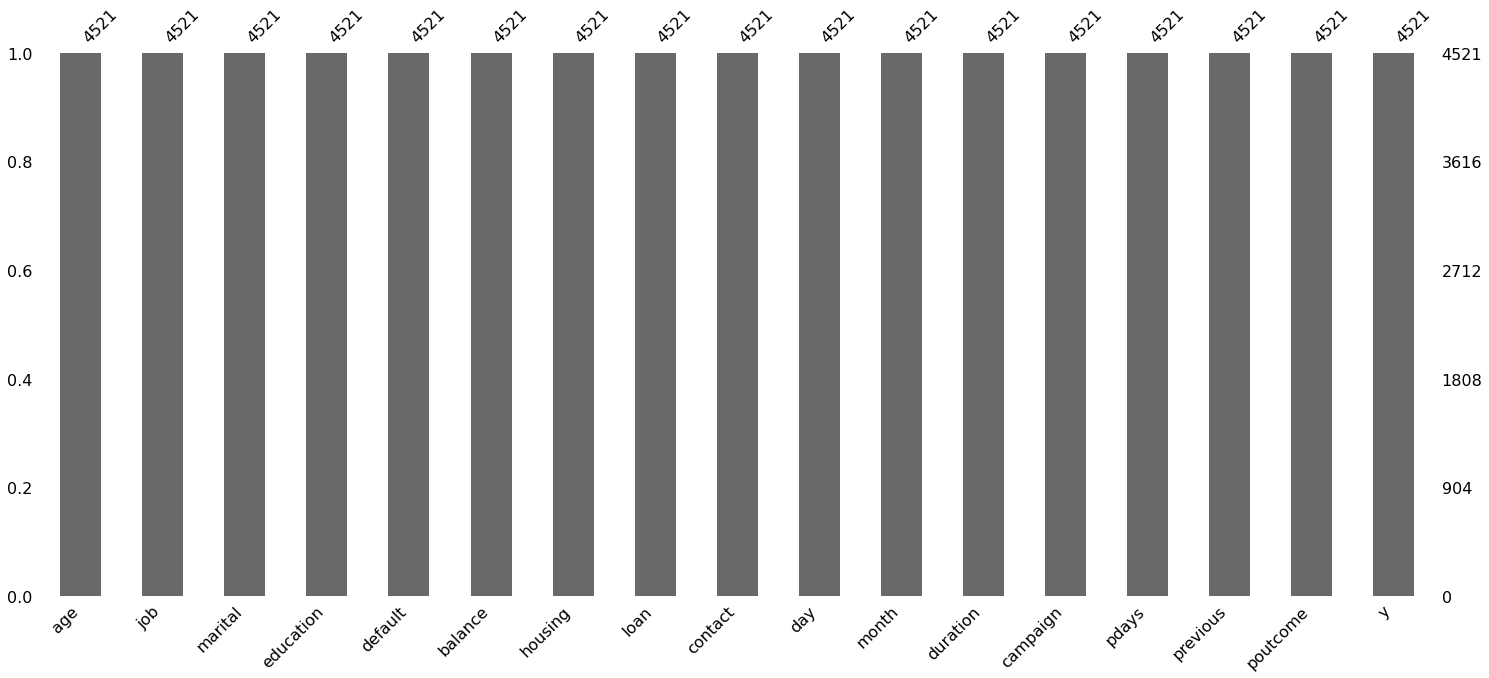

In [ ]:
msno.bar(df)

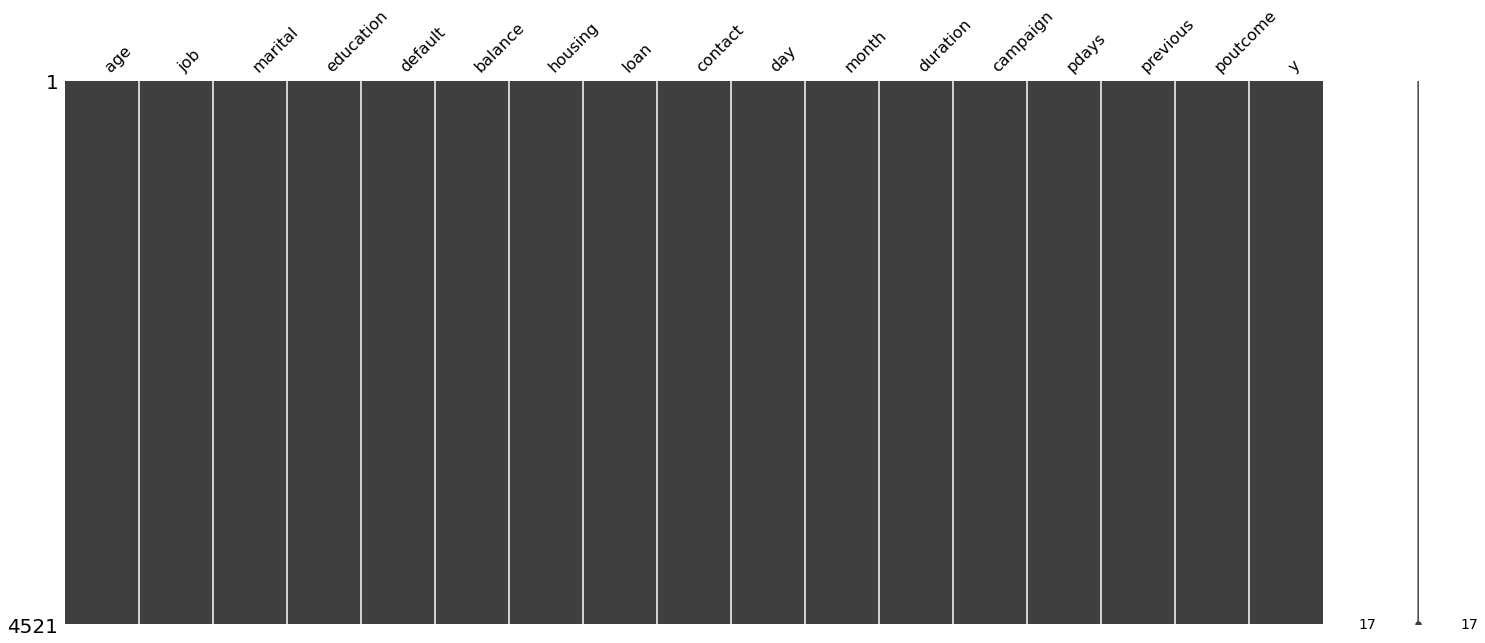

In [ ]:
msno.matrix(df)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


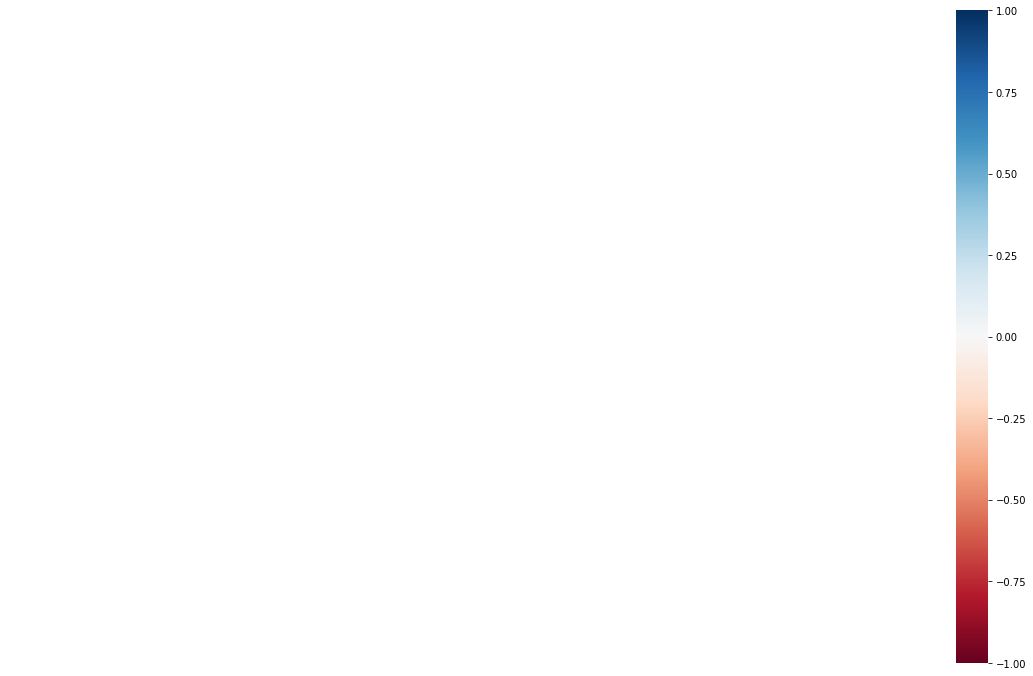

In [ ]:
msno.heatmap(df)

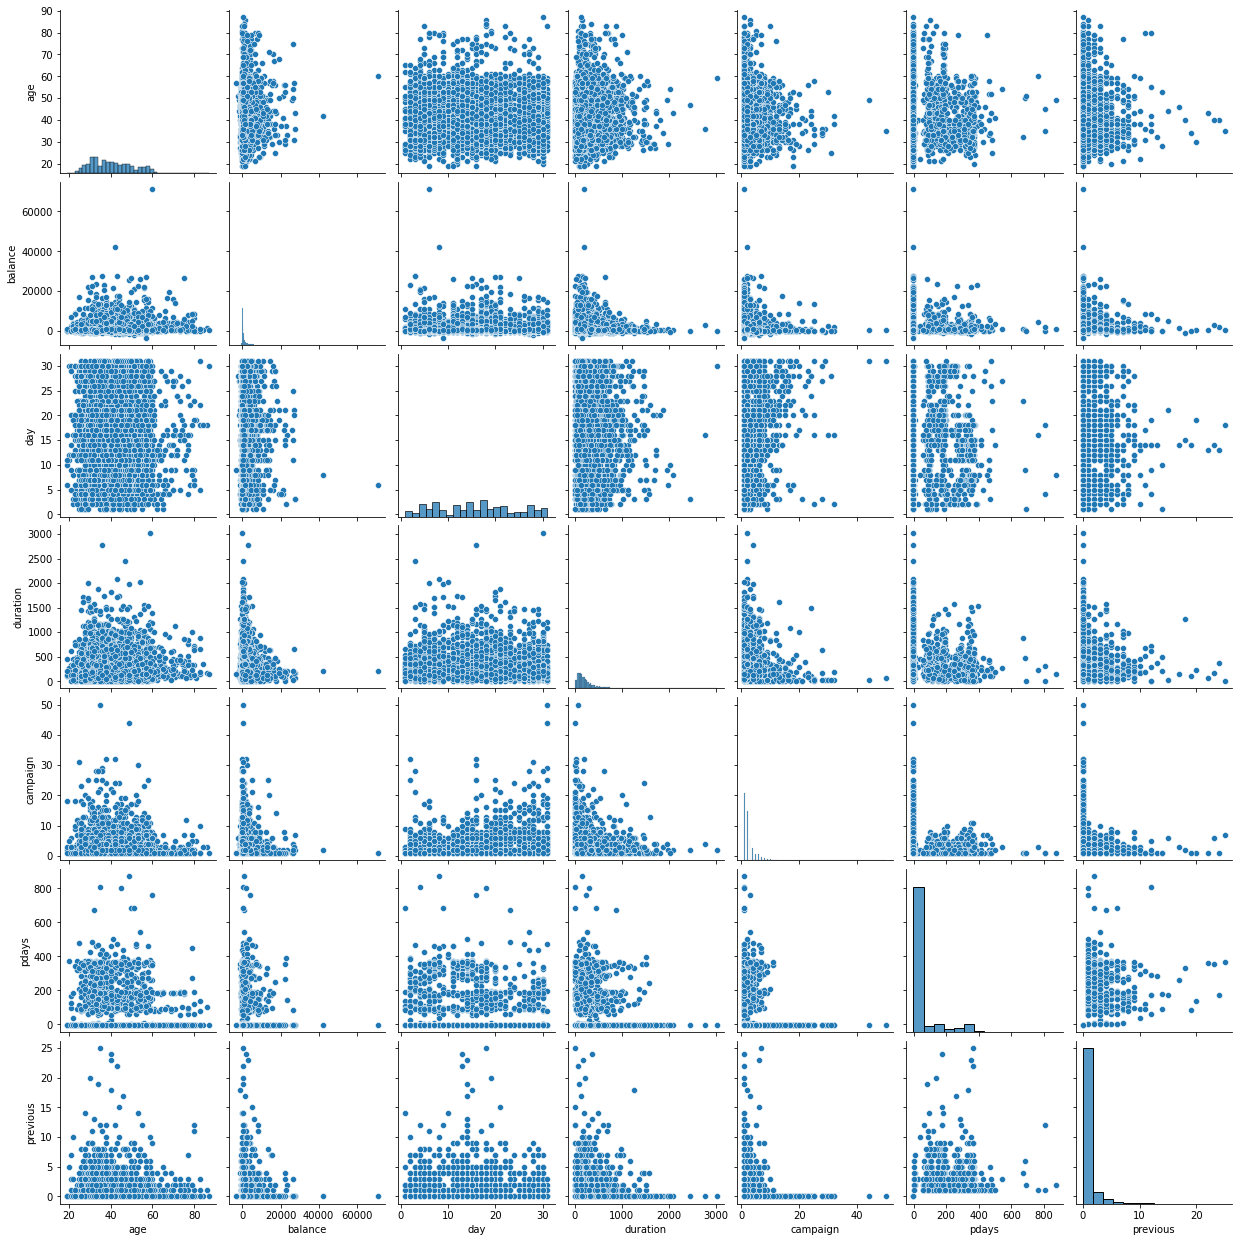

In [ ]:
sns.pairplot(df)

In [ ]:
#df = df.replace(r"unknown",np.nan,inplace=True)

In [ ]:
#df = df.apply(lambda x: np.nan if x=="unknown" else x)

In [ ]:
#df = df.replace(r"\N", np.nan, inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


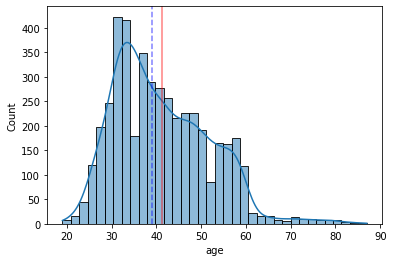

In [ ]:
sns.histplot(df["age"],kde=True)
plt.axvline(x=df.age.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.age.median(), c="blue", alpha=0.5, ls="--", label="median")

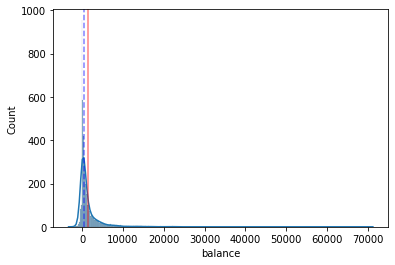

In [ ]:
sns.histplot(df["balance"],kde=True)
plt.axvline(x=df.balance.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.balance.median(), c="blue", alpha=0.5, ls="--", label="median")

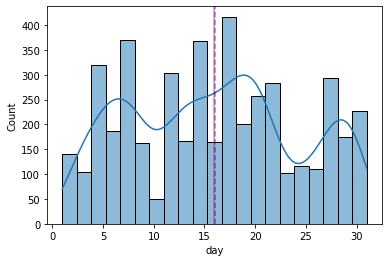

In [ ]:
sns.histplot(df["day"],kde=True)
plt.axvline(x=df.day.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.day.median(), c="blue", alpha=0.5, ls="--", label="median")

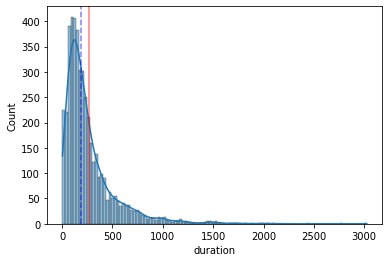

In [ ]:
sns.histplot(df["duration"],kde=True)
plt.axvline(x=df.duration.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.duration.median(), c="blue", alpha=0.5, ls="--", label="median")

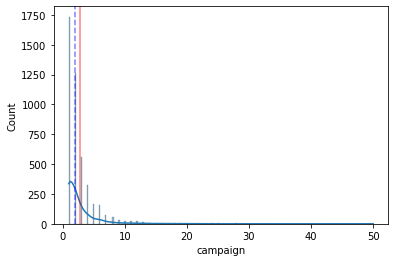

In [ ]:
sns.histplot(df["campaign"],kde=True)
plt.axvline(x=df.campaign.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.campaign.median(), c="blue", alpha=0.5, ls="--", label="median")

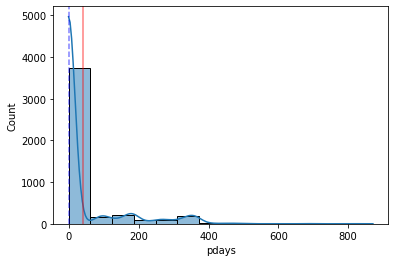

In [ ]:
sns.histplot(df["pdays"],kde=True)
plt.axvline(x=df.pdays.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.pdays.median(), c="blue", alpha=0.5, ls="--", label="median")

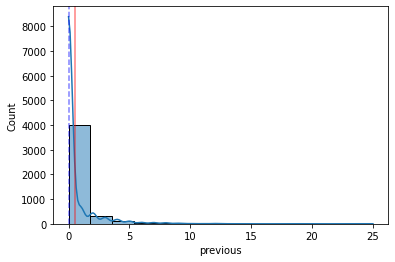

In [ ]:
sns.histplot(df["previous"],kde=True)
plt.axvline(x=df.previous.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.previous.median(), c="blue", alpha=0.5, ls="--", label="median")

# transformation

In [ ]:
df["duration"] = np.log(df["duration"])
df["campaign"] = np.log(df["campaign"])
df["previous"] = np.log(df["previous"])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


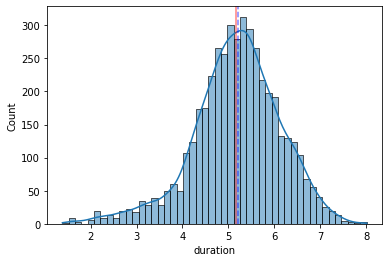

In [ ]:
sns.histplot(df["duration"],kde=True)
plt.axvline(x=df.duration.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.duration.median(), c="blue", alpha=0.5, ls="--", label="median")

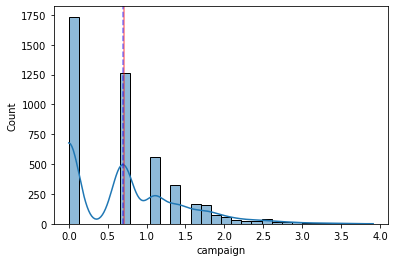

In [ ]:
sns.histplot(df["campaign"],kde=True)
plt.axvline(x=df.campaign.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.campaign.median(), c="blue", alpha=0.5, ls="--", label="median")

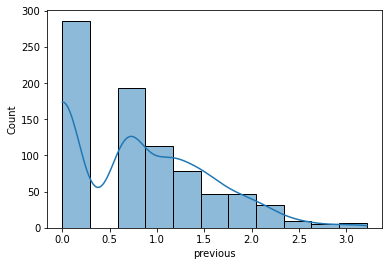

In [ ]:
sns.histplot(df["previous"],kde=True)
plt.axvline(x=df.previous.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.previous.median(), c="blue", alpha=0.5, ls="--", label="median")

# univariate analysis

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,4.369448,0.000000,-1,-inf,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,5.393628,0.000000,339,1.386294,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,5.220356,0.000000,330,0.000000,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,5.293305,1.386294,-1,-inf,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,5.420535,0.000000,-1,-inf,unknown,no


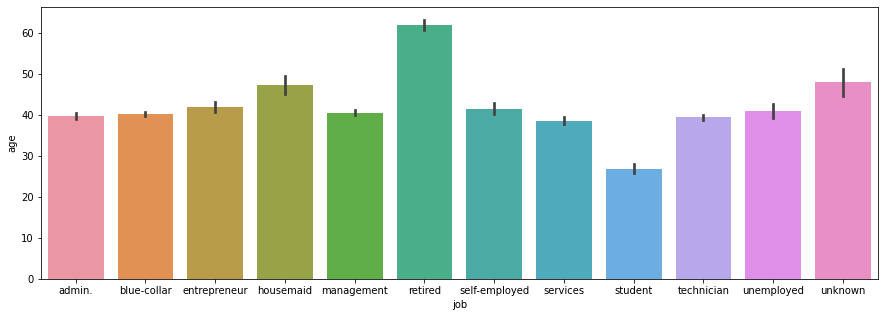

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="job",y="age",data=df)
# above 60 people have retired.
# below 30 years of age people are student.

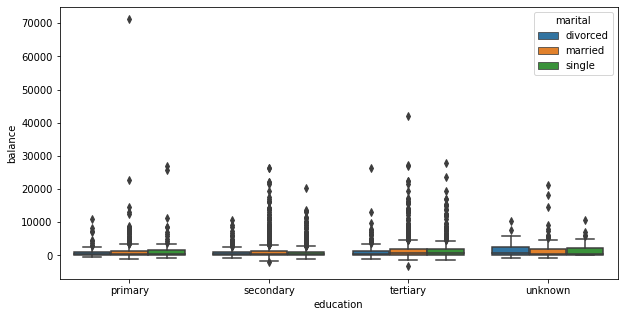

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="education",y="balance", hue="marital",data=df)
# in primary education, married people have highest outlier.
